In [96]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [97]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))


In [98]:
len(filenames)

2367

In [100]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPooling2D, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(224, 224, 3))

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)
base_model.trainable = False

# Add the GlobalMaxPooling2D layer
output_layer = GlobalMaxPooling2D()(base_model.output)

# Create the final model
model = Model(inputs=input_layer, outputs=output_layer)

# Display the model's architecture
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [101]:
img=image.load_img('11258.jpg',target_size=(224,224))
img_array=image.img_to_array(img)
img_expand_dim=np.expand_dims(img_array,axis=0)
img_preprocess=preprocess_input(img_expand_dim)
result=model.predict(img_preprocess).flatten()
norm_result=result/norm(result)
norm_result
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


array([0.00134873, 0.03641898, 0.        , ..., 0.00286176, 0.00219225,
       0.02892584], dtype=float32)

In [102]:
result

array([ 0.4098472, 11.066843 ,  0.       , ...,  0.8696188,  0.6661724,
        8.789858 ], dtype=float32)

In [103]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [104]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


array([0.        , 0.01761618, 0.00171604, ..., 0.01247241, 0.02726403,
       0.06899222], dtype=float32)

In [105]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


[array([0.        , 0.01761618, 0.00171604, ..., 0.01247241, 0.02726403,
        0.06899222], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997915, 0.02375535,
        0.04649905], dtype=float32),
 array([0.        , 0.03507714, 0.00732277, ..., 0.00283509, 0.        ,
        0.05435886], dtype=float32),
 array([0.00232165, 0.05030549, 0.00747744, ..., 0.00346687, 0.03391024,
        0.04565735], dtype=float32),
 array([0.00306834, 0.06240454, 0.        , ..., 0.00170625, 0.02032888,
        0.05833261], dtype=float32)]

In [106]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [107]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [108]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [109]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [111]:
np.array(Image_features).shape

(5, 2048)

In [112]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [113]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [115]:
input_image = extract_features_from_images('11258.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [123]:
data = np.random.rand(5, 128) 
n_neighbors = min(6, len(data))

# Find the neighbors
distance, indices = neighbors.kneighbors([input_image], n_neighbors=n_neighbors)
print(distance, indices)

[[0.87504458 0.91984859 0.96634502 0.97012475 0.97503017]] [[3 4 0 1 2]]


In [124]:
indices[0]

array([3, 4, 0, 1, 2], dtype=int64)

In [125]:
from IPython.display import Image

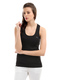

In [126]:
Image('11258.jpg')

In [127]:
filename[indices[0][0]]

'images\\10003.jpg'

In [128]:
filename[indices[0][1]]

'images\\10004.jpg'

In [129]:
filename[indices[0][2]]

'images\\10000.jpg'

In [130]:
filename[indices[0][3]]

'images\\10001.jpg'

In [131]:
filename[indices[0][4]]

'images\\10002.jpg'